In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.columns = ['id','sepallen','sepalwid','petallen','petalwid','spe']

In [ ]:
sns.lmplot()

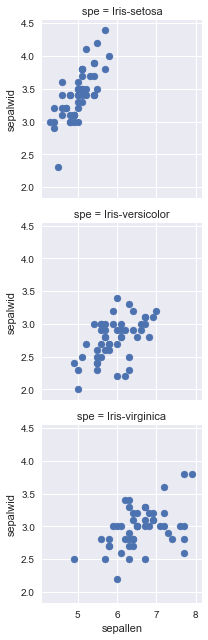

In [8]:
grid = sns.FacetGrid(data=iris,row='spe')
grid.map(plt.scatter,'sepallen','sepalwid')

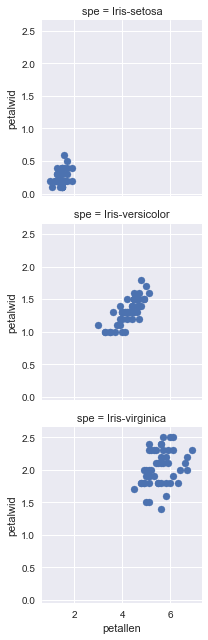

In [10]:
grid = sns.FacetGrid(data=iris,row='spe')
grid.map(plt.scatter,'petallen','petalwid')

In [11]:
iris.describe(include=['O'])
print(iris['spe'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
name_mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':3}

In [13]:
iris['spe']=iris['spe'].map(name_mapping)
iris['spe'].head()

0    0
1    0
2    0
3    0
4    0
Name: spe, dtype: int64

In [14]:
iris=iris.sample(frac=1).reset_index(drop=True)
#randomizing the row order

In [15]:
iris.head()

,id,sepallen,sepalwid,petallen,petalwid,spe
0,92,6.1,3.0,4.6,1.4,1
1,6,5.4,3.9,1.7,0.4,0
2,39,4.4,3.0,1.3,0.2,0
3,132,7.9,3.8,6.4,2.0,3
4,101,6.3,3.3,6.0,2.5,3


In [16]:
iris[['sepalwid','spe']].groupby('spe',as_index=False).mean()

,spe,sepalwid
0,0,3.418
1,1,2.770
2,3,2.974


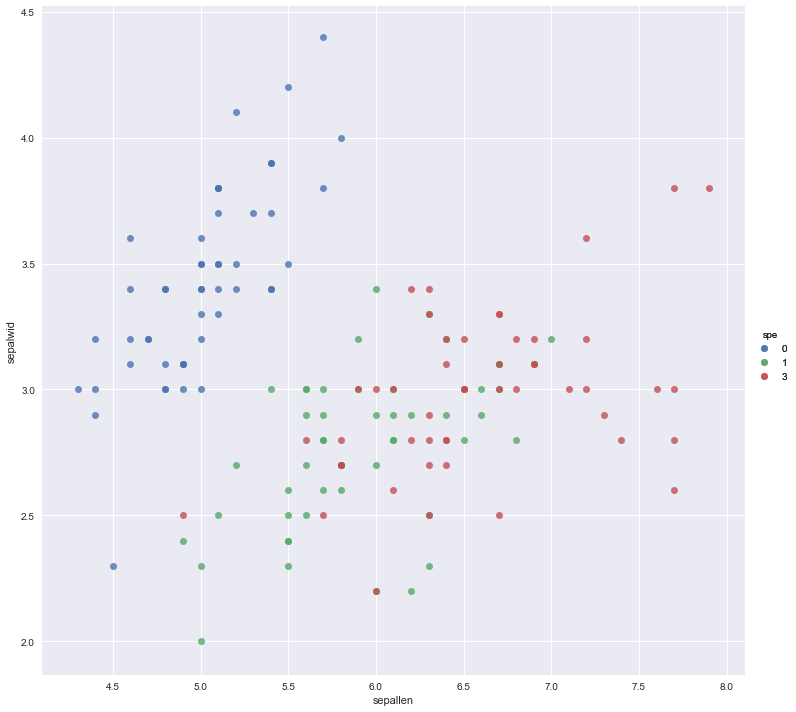

In [17]:
vis1 = sns.lmplot(data=iris,x='sepallen',y='sepalwid',hue='spe',fit_reg=False,size=10)
vis1.add_legend()

In [18]:
iris.drop('id',axis=1,inplace=True)

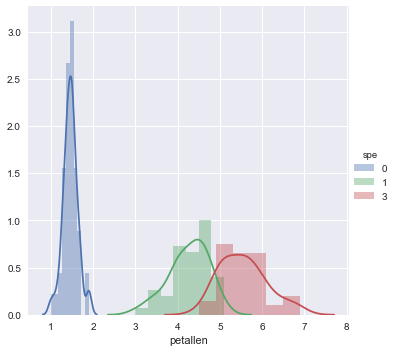

In [19]:
sns.FacetGrid(iris,hue="spe",size=5).map(sns.distplot,"petallen").add_legend()
plt.show()

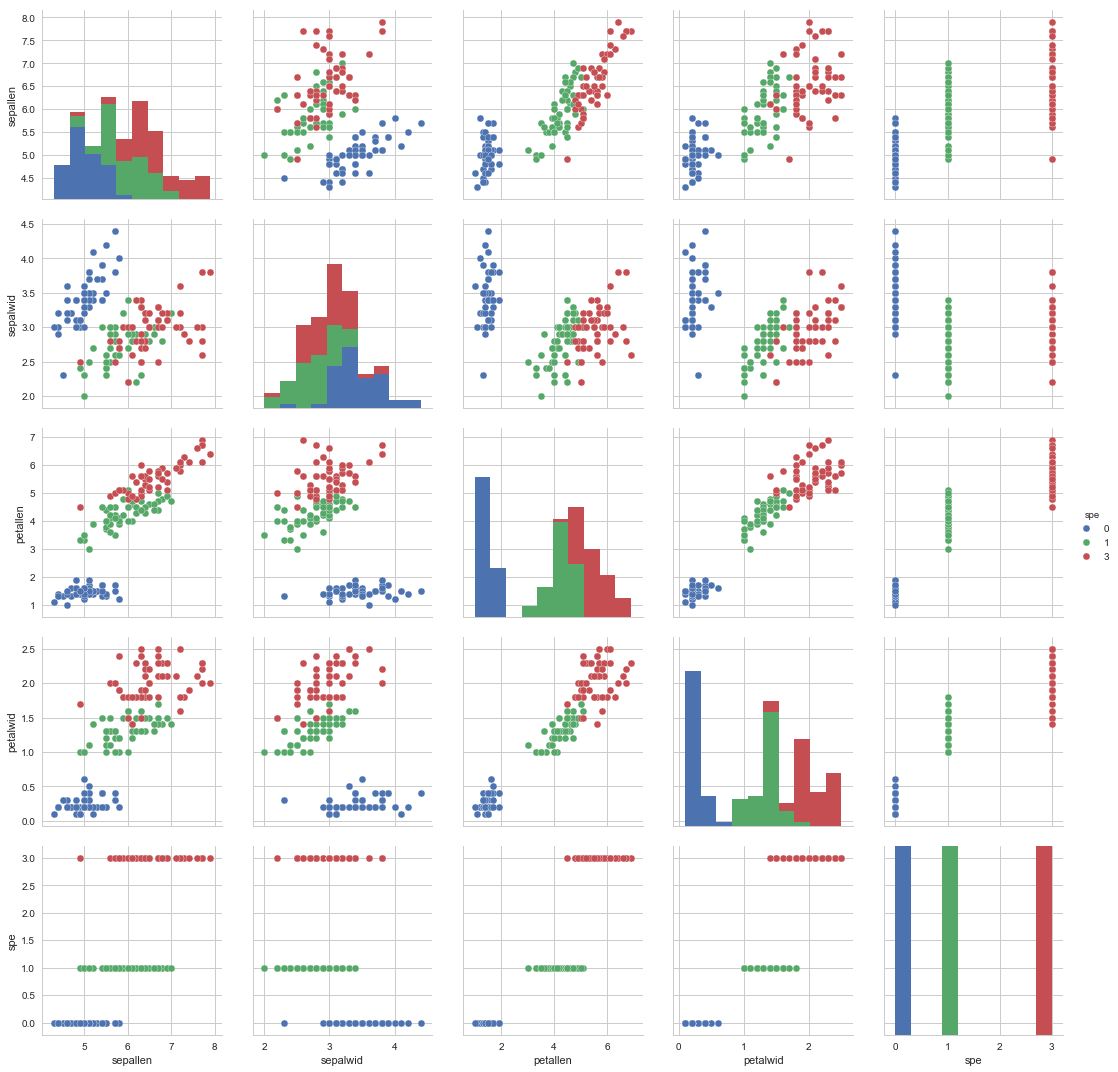

In [20]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris,hue='spe',size=3)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

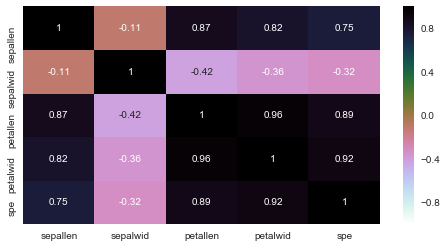

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [23]:
train,test = train_test_split(iris,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [24]:
train_X = train.drop('spe',axis=1)
train_y = train['spe']

test_X = test.drop('spe',axis=1)
test_y = test.spe

In [25]:
train_X.head()

,sepallen,sepalwid,petallen,petalwid
51,6.1,2.8,4.0,1.3
124,6.1,3.0,4.9,1.8
147,5.4,3.4,1.7,0.2
55,6.2,2.2,4.5,1.5
88,7.2,3.6,6.1,2.5


In [26]:
train_y.head()

51     1
124    3
147    0
55     1
88     3
Name: spe, dtype: int64

In [27]:
test_X.head()

,sepallen,sepalwid,petallen,petalwid
108,5.6,2.9,3.6,1.3
2,4.4,3.0,1.3,0.2
145,6.0,2.9,4.5,1.5
25,6.4,3.2,5.3,2.3
26,5.0,3.4,1.5,0.2


In [28]:
svc = SVC()
svc.fit(train_X,train_y)
print('Accuracy of svm is{}'.format(svc.score(test_X,test_y)))
#prediction = svc.predict(test_X)
#print('accuracy of the svm is',metrics.accuracy_score(prediction,test_y))

Accuracy of svm is0.9777777777777777


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X,train_y)
print('Accuracy of decision tree is{}'.format(decision_tree.score(test_X,test_y)))

Accuracy of decision tree is0.9777777777777777


In [30]:
logreg = LogisticRegression()
logreg.fit(train_X,train_y)
print('Accuracy of logistic regression is{}'.format(logreg.score(test_X,test_y)))

Accuracy of logistic regression is0.9555555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
